In [4]:
print(adata.obs.columns)

Index(['sample', 'batch', 'doublet_scores', 'predicted_doublet',
       'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts',
       'log1p_total_counts', 'percent_mito', 'M.Number', 'treatment',
       'infection dose', 'Tissue name', 'CFU/granuloma', 'total thoracic CFU',
       'lung region', 'Gran State', 'n_counts', 'n_genes',
       'General Celltypes'],
      dtype='object')


In [12]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load the .h5ad file
adata = sc.read_h5ad("all_cells.h5ad")

# Function to plot and test correlation for three treatments
def plot_gene_correlation_three(gene1, gene2, adata_subset, treatments):
    fig, axs = plt.subplots(1, len(treatments), figsize=(18, 5))
    
    for idx, treatment in enumerate(treatments):
        data1 = adata_subset[adata_subset.obs['treatment'] == treatment][:, gene1].X
        data2 = adata_subset[adata_subset.obs['treatment'] == treatment][:, gene2].X
        correlation, p_value = pearsonr(data1.flatten(), data2.flatten())
        
        sc_plot = axs[idx].scatter(data1, data2, s=5, c=data1, cmap='coolwarm')
        axs[idx].set_title(f'{treatment}:\nCorrelation: {correlation:.2f}, p-value: {p_value:.2e}')
        axs[idx].set_xlabel(gene1)
        axs[idx].set_ylabel(gene2)
        plt.colorbar(sc_plot, ax=axs[idx], orientation='horizontal')

    plt.suptitle(f'Correlation of {gene1} vs {gene2} in {cell_type}')
    plt.show()

# Get user input
gene1 = input("Enter the first gene: ")
gene2 = input("Enter the second gene: ")
cell_type = input("Enter the cell type or 'all' for a general comparison: ")

if cell_type.lower() == 'all':
    adata_subset = adata
else:
    adata_subset = adata[adata.obs['General Celltypes'] == cell_type]

comparison_type = input("Would you like to compare within one treatment, between two treatments, or three treatments? (one/two/three): ").lower()

if comparison_type == 'one':
    treatment = input("Enter the treatment type: ")
    plot_gene_correlation_three(gene1, gene2, adata_subset, [treatment])
elif comparison_type == 'two':
    treatment1 = input("Enter the first treatment type: ")
    treatment2 = input("Enter the second treatment type: ")
    plot_gene_correlation_three(gene1, gene2, adata_subset, [treatment1, treatment2])
elif comparison_type == 'three':
    treatment1 = input("Enter the first treatment type: ")
    treatment2 = input("Enter the second treatment type: ")
    treatment3 = input("Enter the third treatment type: ")
    plot_gene_correlation_three(gene1, gene2, adata_subset, [treatment1, treatment2, treatment3])
else:
    print("Invalid comparison type selected.")



SyntaxError: invalid syntax. Perhaps you forgot a comma? (2324275671.py, line 21)

Enter the first gene:  GZMA
Enter the second gene:  GNLY
Enter the cell type or 'all' for a general comparison:  pDC
Would you like to compare within one treatment, between two treatments, or three treatments? (one/two/three):  three
Enter the first treatment type:  IgG
Enter the second treatment type:  CD8a
Enter the third treatment type:  CD8b


ValueError: 'c' argument has 1 elements, which is inconsistent with 'x' and 'y' with size 198.

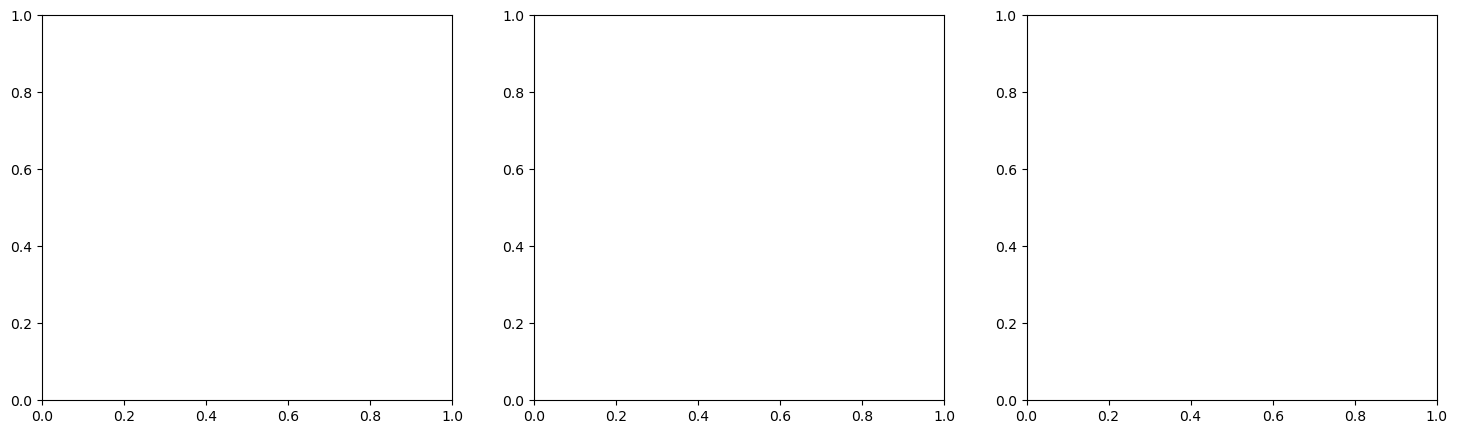

In [16]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load the .h5ad file
adata = sc.read_h5ad("all_cells.h5ad")

# Function to plot and test correlation for three treatments
def plot_gene_correlation_three(gene1, gene2, adata_subset, treatments):
    fig, axs = plt.subplots(1, len(treatments), figsize=(18, 5))
    
    for idx, treatment in enumerate(treatments):
        data1 = adata_subset[adata_subset.obs['treatment'] == treatment][:, gene1].X
        data2 = adata_subset[adata_subset.obs['treatment'] == treatment][:, gene2].X
        correlation, p_value = pearsonr(data1.flatten(), data2.flatten())

        sc_plot = axs[idx].scatter(data1, data2, s=5, c=correlation, cmap='coolwarm')
        axs[idx].set_title(f'{treatment}:\nCorrelation: {correlation:.2f}, p-value: {p_value:.2e}')
        axs[idx].set_xlabel(gene1)
        axs[idx].set_ylabel(gene2)
        plt.colorbar(sc_plot, ax=axs[idx], orientation='horizontal')

    plt.suptitle(f'Correlation of {gene1} vs {gene2} in {cell_type}')
    plt.show()

# Get user input
gene1 = input("Enter the first gene: ")
gene2 = input("Enter the second gene: ")
cell_type = input("Enter the cell type or 'all' for a general comparison: ")

if cell_type.lower() == 'all':
    adata_subset = adata
else:
    adata_subset = adata[adata.obs['General Celltypes'] == cell_type]

comparison_type = input("Would you like to compare within one treatment, between two treatments, or three treatments? (one/two/three): ").lower()

if comparison_type == 'one':
    treatment = input("Enter the treatment type: ")
    plot_gene_correlation_three(gene1, gene2, adata_subset, [treatment])
elif comparison_type == 'two':
    treatment1 = input("Enter the first treatment type: ")
    treatment2 = input("Enter the second treatment type: ")
    plot_gene_correlation_three(gene1, gene2, adata_subset, [treatment1, treatment2])
elif comparison_type == 'three':
    treatment1 = input("Enter the first treatment type: ")
    treatment2 = input("Enter the second treatment type: ")
    treatment3 = input("Enter the third treatment type: ")
    plot_gene_correlation_three(gene1, gene2, adata_subset, [treatment1, treatment2, treatment3])
else:
    print("Invalid comparison type selected.")


Enter the first gene:  GZMB
Enter the second gene:  GZMA
Enter the cell type or 'all' for a general comparison:  Macrophages/Monocytes
Would you like to compare within one treatment, between two treatments, or three treatments? (one/two/three):  three
Enter the first treatment type:  IgG
Enter the second treatment type:  CD8a
Enter the third treatment type:  CD8b


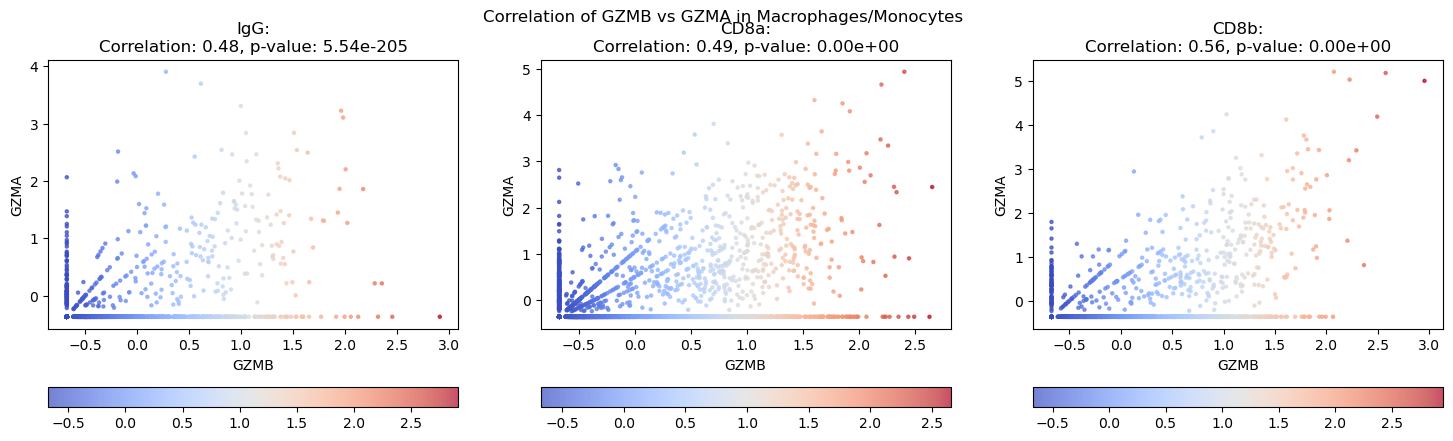

In [20]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Load the .h5ad file
adata = sc.read_h5ad("all_cells.h5ad")

# Function to plot and test correlation for three treatments
def plot_gene_correlation_three(gene1, gene2, adata_subset, treatments):
    fig, axs = plt.subplots(1, len(treatments), figsize=(18, 5))
    
    for idx, treatment in enumerate(treatments):
        data1 = adata_subset[adata_subset.obs['treatment'] == treatment][:, gene1].X
        data2 = adata_subset[adata_subset.obs['treatment'] == treatment][:, gene2].X

        if len(data1) < 2 or len(data2) < 2:
            print(f"Not enough data points for {treatment}. Skipping...")
            continue

        correlation, p_value = pearsonr(data1.flatten(), data2.flatten())

        sc_plot = axs[idx].scatter(data1, data2, s=5, c=data1, cmap='coolwarm', alpha=0.7)
        axs[idx].set_title(f'{treatment}:\nCorrelation: {correlation:.2f}, p-value: {p_value:.2e}')
        axs[idx].set_xlabel(gene1)
        axs[idx].set_ylabel(gene2)
        plt.colorbar(sc_plot, ax=axs[idx], orientation='horizontal')

    plt.suptitle(f'Correlation of {gene1} vs {gene2} in {cell_type}')
    plt.show()

# Get user input
gene1 = input("Enter the first gene: ")
gene2 = input("Enter the second gene: ")
cell_type = input("Enter the cell type or 'all' for a general comparison: ")

if cell_type.lower() == 'all':
    adata_subset = adata
else:
    adata_subset = adata[adata.obs['General Celltypes'] == cell_type]

comparison_type = input("Would you like to compare within one treatment, between two treatments, or three treatments? (one/two/three): ").lower()

if comparison_type == 'one':
    treatment = input("Enter the treatment type: ")
    plot_gene_correlation_three(gene1, gene2, adata_subset, [treatment])
elif comparison_type == 'two':
    treatment1 = input("Enter the first treatment type: ")
    treatment2 = input("Enter the second treatment type: ")
    plot_gene_correlation_three(gene1, gene2, adata_subset, [treatment1, treatment2])
elif comparison_type == 'three':
    treatment1 = input("Enter the first treatment type: ")
    treatment2 = input("Enter the second treatment type: ")
    treatment3 = input("Enter the third treatment type: ")
    plot_gene_correlation_three(gene1, gene2, adata_subset, [treatment1, treatment2, treatment3])
else:
    print("Invalid comparison type selected.")


Enter the first gene:  GZMA
Enter the second gene:  GZMB
Enter the cell type or 'all' for a general comparison:  Macrophages/Monocytes
Would you like to compare within one treatment, between two treatments, or three treatments? (one/two/three):  three
Enter the first treatment type:  IgG
Enter the second treatment type:  CD8a
Enter the third treatment type:  CD8b


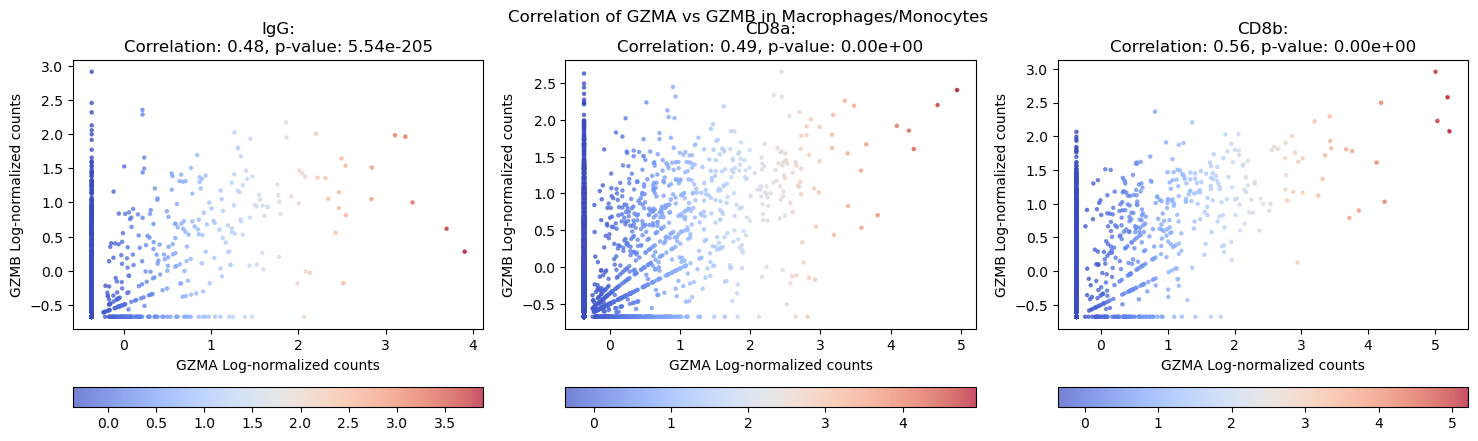

In [22]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load the .h5ad file
adata = sc.read_h5ad("all_cells.h5ad")

# Function to plot and test correlation for three treatments
def plot_gene_correlation_three(gene1, gene2, adata_subset, treatments):
    fig, axs = plt.subplots(1, len(treatments), figsize=(18, 5))
    
    for idx, treatment in enumerate(treatments):
        data1 = adata_subset[adata_subset.obs['treatment'] == treatment][:, gene1].X
        data2 = adata_subset[adata_subset.obs['treatment'] == treatment][:, gene2].X

        if len(data1) < 2 or len(data2) < 2:
            print(f"Not enough data points for {treatment}. Skipping...")
            continue

        correlation, p_value = pearsonr(data1.flatten(), data2.flatten())

        sc_plot = axs[idx].scatter(data1, data2, s=5, c=data1, cmap='coolwarm', alpha=0.7)
        axs[idx].set_title(f'{treatment}:\nCorrelation: {correlation:.2f}, p-value: {p_value:.2e}')
        axs[idx].set_xlabel(f"{gene1} Log-normalized counts")
        axs[idx].set_ylabel(f"{gene2} Log-normalized counts")
        plt.colorbar(sc_plot, ax=axs[idx], orientation='horizontal')

    plt.suptitle(f'Correlation of {gene1} vs {gene2} in {cell_type}')
    plt.show()

# Get user input
gene1 = input("Enter the first gene: ")
gene2 = input("Enter the second gene: ")
cell_type = input("Enter the cell type or 'all' for a general comparison: ")

if cell_type.lower() == 'all':
    adata_subset = adata
else:
    adata_subset = adata[adata.obs['General Celltypes'] == cell_type]

comparison_type = input("Would you like to compare within one treatment, between two treatments, or three treatments? (one/two/three): ").lower()

if comparison_type == 'one':
    treatment = input("Enter the treatment type: ")
    plot_gene_correlation_three(gene1, gene2, adata_subset, [treatment])
elif comparison_type == 'two':
    treatment1 = input("Enter the first treatment type: ")
    treatment2 = input("Enter the second treatment type: ")
    plot_gene_correlation_three(gene1, gene2, adata_subset, [treatment1, treatment2])
elif comparison_type == 'three':
    treatment1 = input("Enter the first treatment type: ")
    treatment2 = input("Enter the second treatment type: ")
    treatment3 = input("Enter the third treatment type: ")
    plot_gene_correlation_three(gene1, gene2, adata_subset, [treatment1, treatment2, treatment3])
else:
    print("Invalid comparison type selected.")
